In [1]:
from google.colab import files
uploaded = files.upload()

Saving highlands_customer_full_dataset.csv to highlands_customer_full_dataset.csv


Null values per column:
 ID                  0
Name                0
Recency             0
Frequency           0
Monetary            0
Favorite_Product    0
Order_Time          0
Channel             0
Store_Location      0
dtype: int64

Data types:
 ID                    int64
Name                 object
Recency               int64
Frequency             int64
Monetary            float64
Favorite_Product     object
Order_Time           object
Channel              object
Store_Location       object
dtype: object


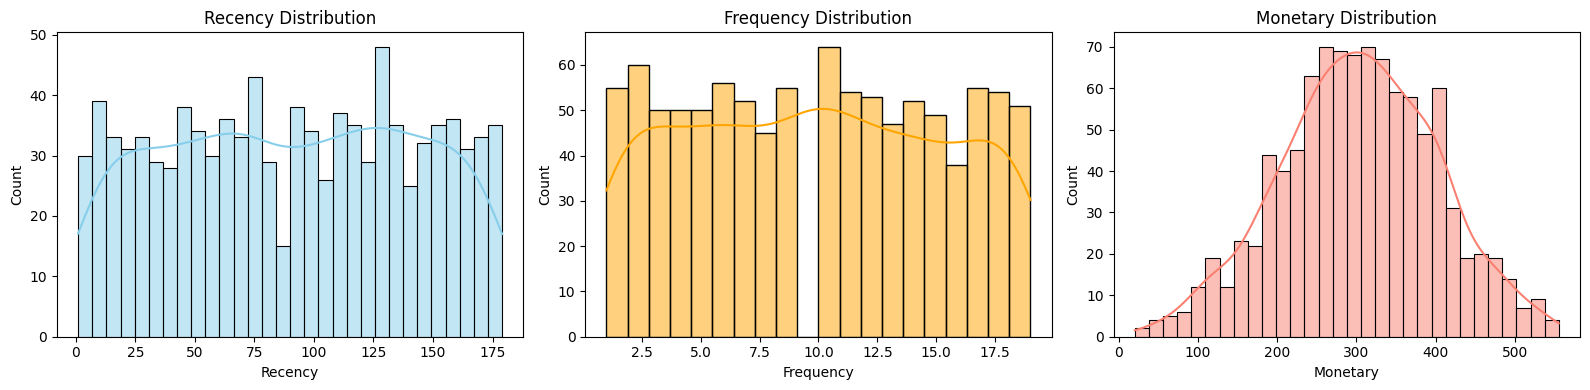

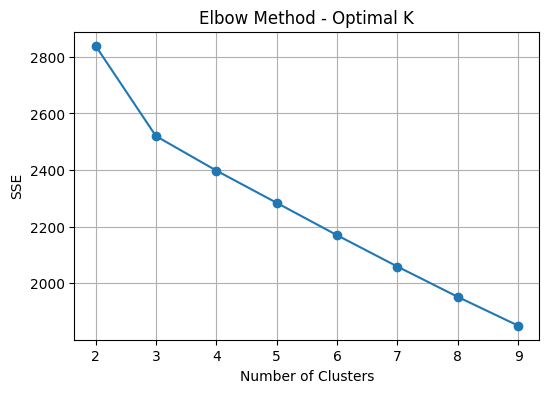

📊 Cluster Summary:
          Recency  Frequency  Monetary
Cluster                              
0          93.58      10.07    298.30
1          91.53       9.45    307.59
2          88.95      10.28    305.00
3          89.71       9.77    295.61


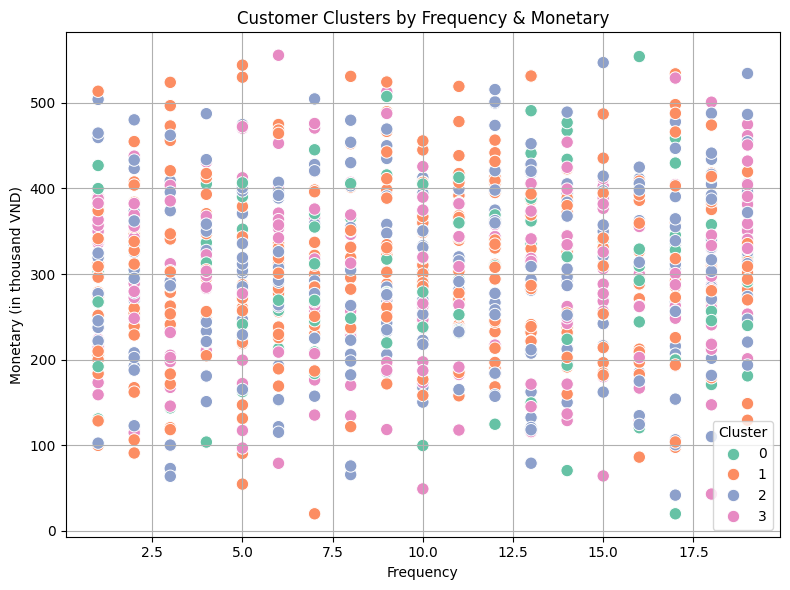

In [13]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("highlands_customer_full_dataset.csv")

# 3. Data Cleaning
# 3.1 Null check
print("Null values per column:\n", df.isnull().sum())

# 3.2 Type consistency
print("\nData types:\n", df.dtypes)

# 3.3 Outlier removal for Monetary (top 1%)
q99 = df["Monetary"].quantile(0.99)
df = df[df["Monetary"] <= q99]

# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df["Recency"], bins=30, kde=True, color="skyblue")
plt.title("Recency Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df["Frequency"], bins=20, kde=True, color="orange")
plt.title("Frequency Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df["Monetary"], bins=30, kde=True, color="salmon")
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()

# 5. Feature Engineering
# 5.1 One-hot encoding for categorical features
categorical_cols = ["Favorite_Product", "Order_Time", "Channel", "Store_Location"]
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# 5.2 Scaling RFM
scaler = MinMaxScaler()
df_encoded[["Recency", "Frequency", "Monetary"]] = scaler.fit_transform(
    df_encoded[["Recency", "Frequency", "Monetary"]]
)

# 6. Modeling Preparation
X = df_encoded.drop(["ID", "Name"], axis=1, errors='ignore')

# 7. Elbow Method for optimal K
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), sse, marker="o")
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

# 8. Apply KMeans (K=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# 9. Cluster Summary
cluster_summary = df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean().round(2)
print("📊 Cluster Summary:\n", cluster_summary)

# 10. Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Frequency", y="Monetary", hue="Cluster", palette="Set2", s=80)
plt.title("Customer Clusters by Frequency & Monetary")
plt.xlabel("Frequency")
plt.ylabel("Monetary (in thousand VND)")
plt.grid(True)
plt.tight_layout()
plt.show()

